In [1]:
#PROJECT 2: EFFICIENT FRONTIER
##ECO 41552 - QUANT. FINANCE | PROFESSOR JOHN DROESCHER

In [85]:
import yfinance as yf
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt
import scipy.optimize as sco
import math
import numpy as np

In [86]:
tickers = ['DIS', 'RCI', 'WBD', 'EA', 'INFY', 'IBM', 'VOD']

period = '2y'

p1 = yf.download(tickers, period = period)['Adj Close'].pct_change()

returns = p1


[*********************100%***********************]  7 of 7 completed


In [87]:
class ef:
    def __init__(self, returns, assets):
        self.returns = returns
        self.assets = assets
    
    def comp(self):
        self.tbl = pd.DataFrame(index=self.assets)
        self.tbl['Mean']=returns.mean()
        self.tbl['Variance']=returns.var()
        return(self.tbl.T)
    
    def corr(self):
        self.tbl=pd.DataFrame(index=self.assets)
        self.corr = returns.corr()
        return(self.corr)

In [88]:
table = ef(returns=returns, assets=tickers)
display(table.comp().T,table.corr())

,Mean,Variance
DIS,-0.001070,0.000382
RCI,0.000188,0.000168
WBD,-0.001523,0.001138
EA,-0.000122,0.000250
INFY,0.000056,0.000292
IBM,0.000346,0.000193
VOD,-0.000633,0.000301


,DIS,EA,IBM,INFY,RCI,VOD,WBD
DIS,1.000000,0.306744,0.291227,0.373332,0.288311,0.380063,0.545256
EA,0.306744,1.000000,0.191670,0.230426,0.216253,0.246588,0.274440
IBM,0.291227,0.191670,1.000000,0.344994,0.322293,0.304709,0.229414
INFY,0.373332,0.230426,0.344994,1.000000,0.253284,0.278484,0.284909
RCI,0.288311,0.216253,0.322293,0.253284,1.000000,0.395350,0.224962
VOD,0.380063,0.246588,0.304709,0.278484,0.395350,1.000000,0.309552
WBD,0.545256,0.274440,0.229414,0.284909,0.224962,0.309552,1.000000


In [89]:
def p_return(weight):
    return np.sum(returns.mean() * weight) * 252

def p_volume(weight):
    return np.sqrt(np.dot(weight.T, np.dot(returns.cov() * 252, weight)))

In [90]:
alt = len(tickers)
p_ret = []
p_vol = []
for p in range (25000):    
    weight = np.random.random(alt)                   
    weight /= np.sum(weight)                               
    p_ret.append(p_return(weight)) 
    p_vol.append(p_volume(weight))
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)

In [91]:
weight

array([0.22706775, 0.11551475, 0.06953211, 0.16571698, 0.28670408,
       0.03850391, 0.09696042])

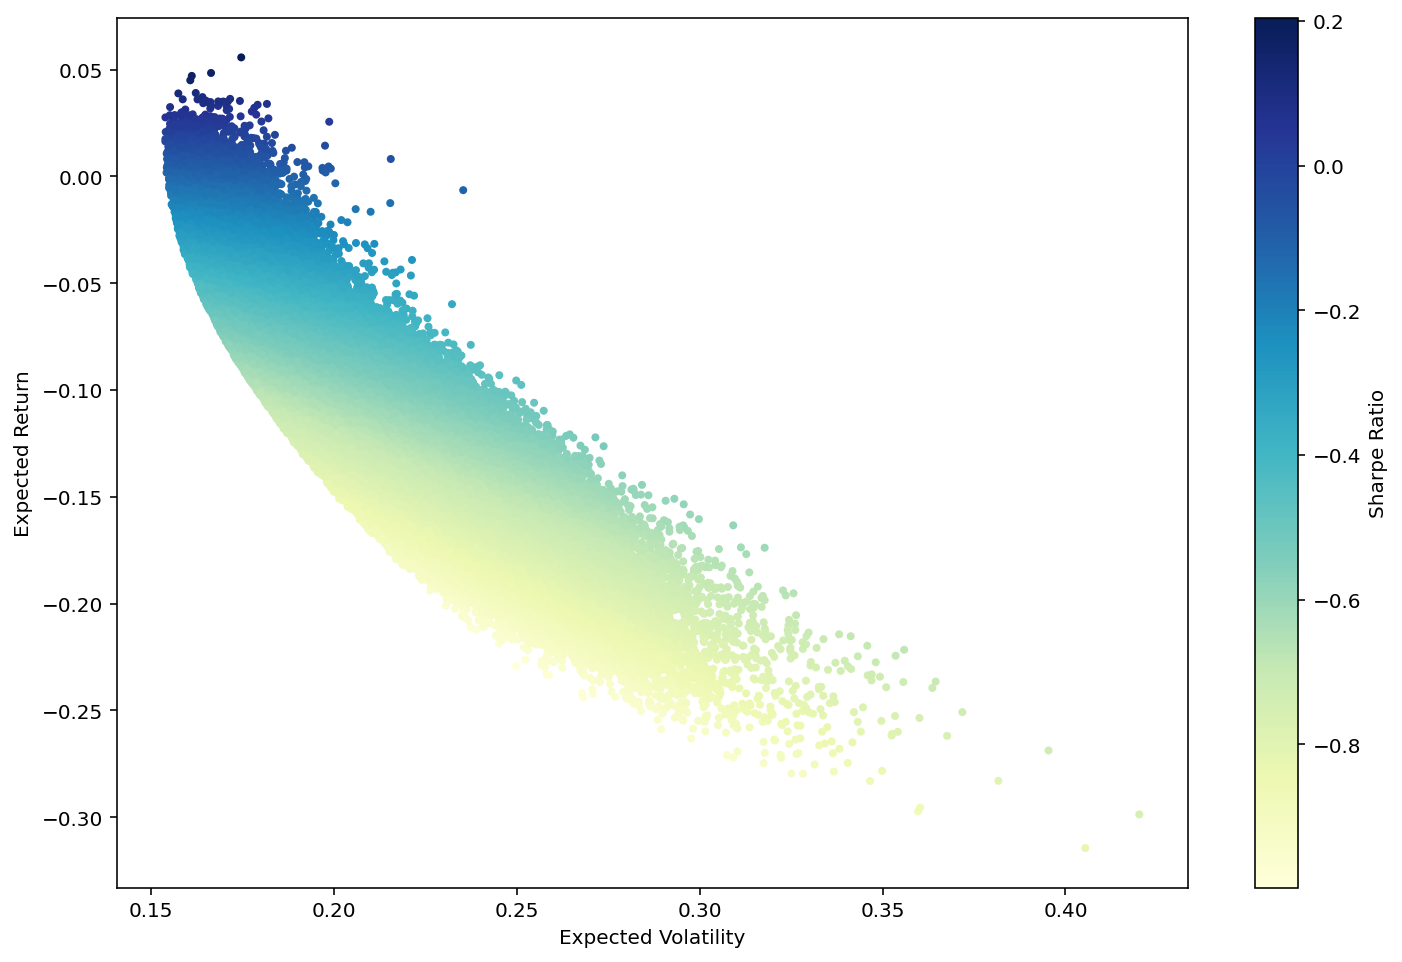

In [101]:
plt.figure(figsize=(12,8))
plt.scatter(expectedVolumen,expectedReturn, c=sharpe, marker = '.',cmap='YlGnBu')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

In [ ]:
#SOURCES
#https://docs.python.org/3/tutorial/classes.html
#https://www.w3schools.com/python/gloss_python_class_init.asp
#https://pythonprogramminglanguage.com/python-self/
#https://www.w3schools.com/python/ref_func_len.asp
#https://medium.com/python-data/effient-frontier-in-python-34b0c3043314
#https://medium.com/python-data/efficient-frontier-portfolio-optimization-with-python-part-2-2-2fe23413ad94
#http://www.bradfordlynch.com/blog/2015/12/04/InvestmentPortfolioOptimization.html
#https://www.investopedia.com/terms/e/efficientfrontier.asp
#Python for Finance: Mastering Data-Driven Finance, Yves Hilpisch
#Professor John Droescher